## Assignments

To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below
1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

1. First, load the dataset from the weatherinszeged table from Thinkful's database.
2. Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.
3. Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

As in earlier assignments, be sure to close the database connection after initially pulling in your data.
2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

    Load the houseprices data from Thinkful's database.
    Reimplement the model you built in the previous checkpoint.
    Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
    be sure to close the database connection after initially pulling in your data.



## Part one: Predicting temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()



In [2]:
weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [4]:
weather_df.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [5]:
weather_df.isnull().sum()

date                   0
summary                0
preciptype             0
temperature            0
apparenttemperature    0
humidity               0
windspeed              0
windbearing            0
visibility             0
loudcover              0
pressure               0
dailysummary           0
dtype: int64

In [6]:
total_missing = weather_df.isnull().sum().sort_values(ascending=False)
percent_missing = (weather_df.isnull().sum()/weather_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
dailysummary,0,0.000
pressure,0,0.000
loudcover,0,0.000
visibility,0,0.000
windbearing,0,0.000
windspeed,0,0.000
humidity,0,0.000
apparenttemperature,0,0.000
temperature,0,0.000
preciptype,0,0.000


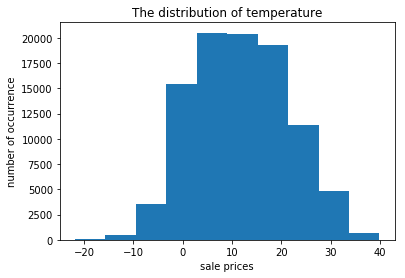

In [7]:
plt.hist(weather_df.temperature)
plt.title('The distribution of temperature')
plt.xlabel('sale prices')
plt.ylabel('number of occurrence')
plt.show()

Temperature is normally distributed. 

In [8]:
weather_num_df = weather_df.select_dtypes(include=[np.number])
weather_num_df.head()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
0,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130
1,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630
2,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940
3,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410
4,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510


In [9]:
weather_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dtypes: float64(8)
memory usage: 5.9 MB


In [10]:
#look at correlation of each potential numeric feature with target
np.abs(weather_num_df.iloc[:,0:].corr().loc[:,'temperature']).sort_values(ascending=False)

temperature           1.000
apparenttemperature   0.993
humidity              0.632
visibility            0.393
windbearing           0.030
windspeed             0.009
pressure              0.005
loudcover               nan
Name: temperature, dtype: float64

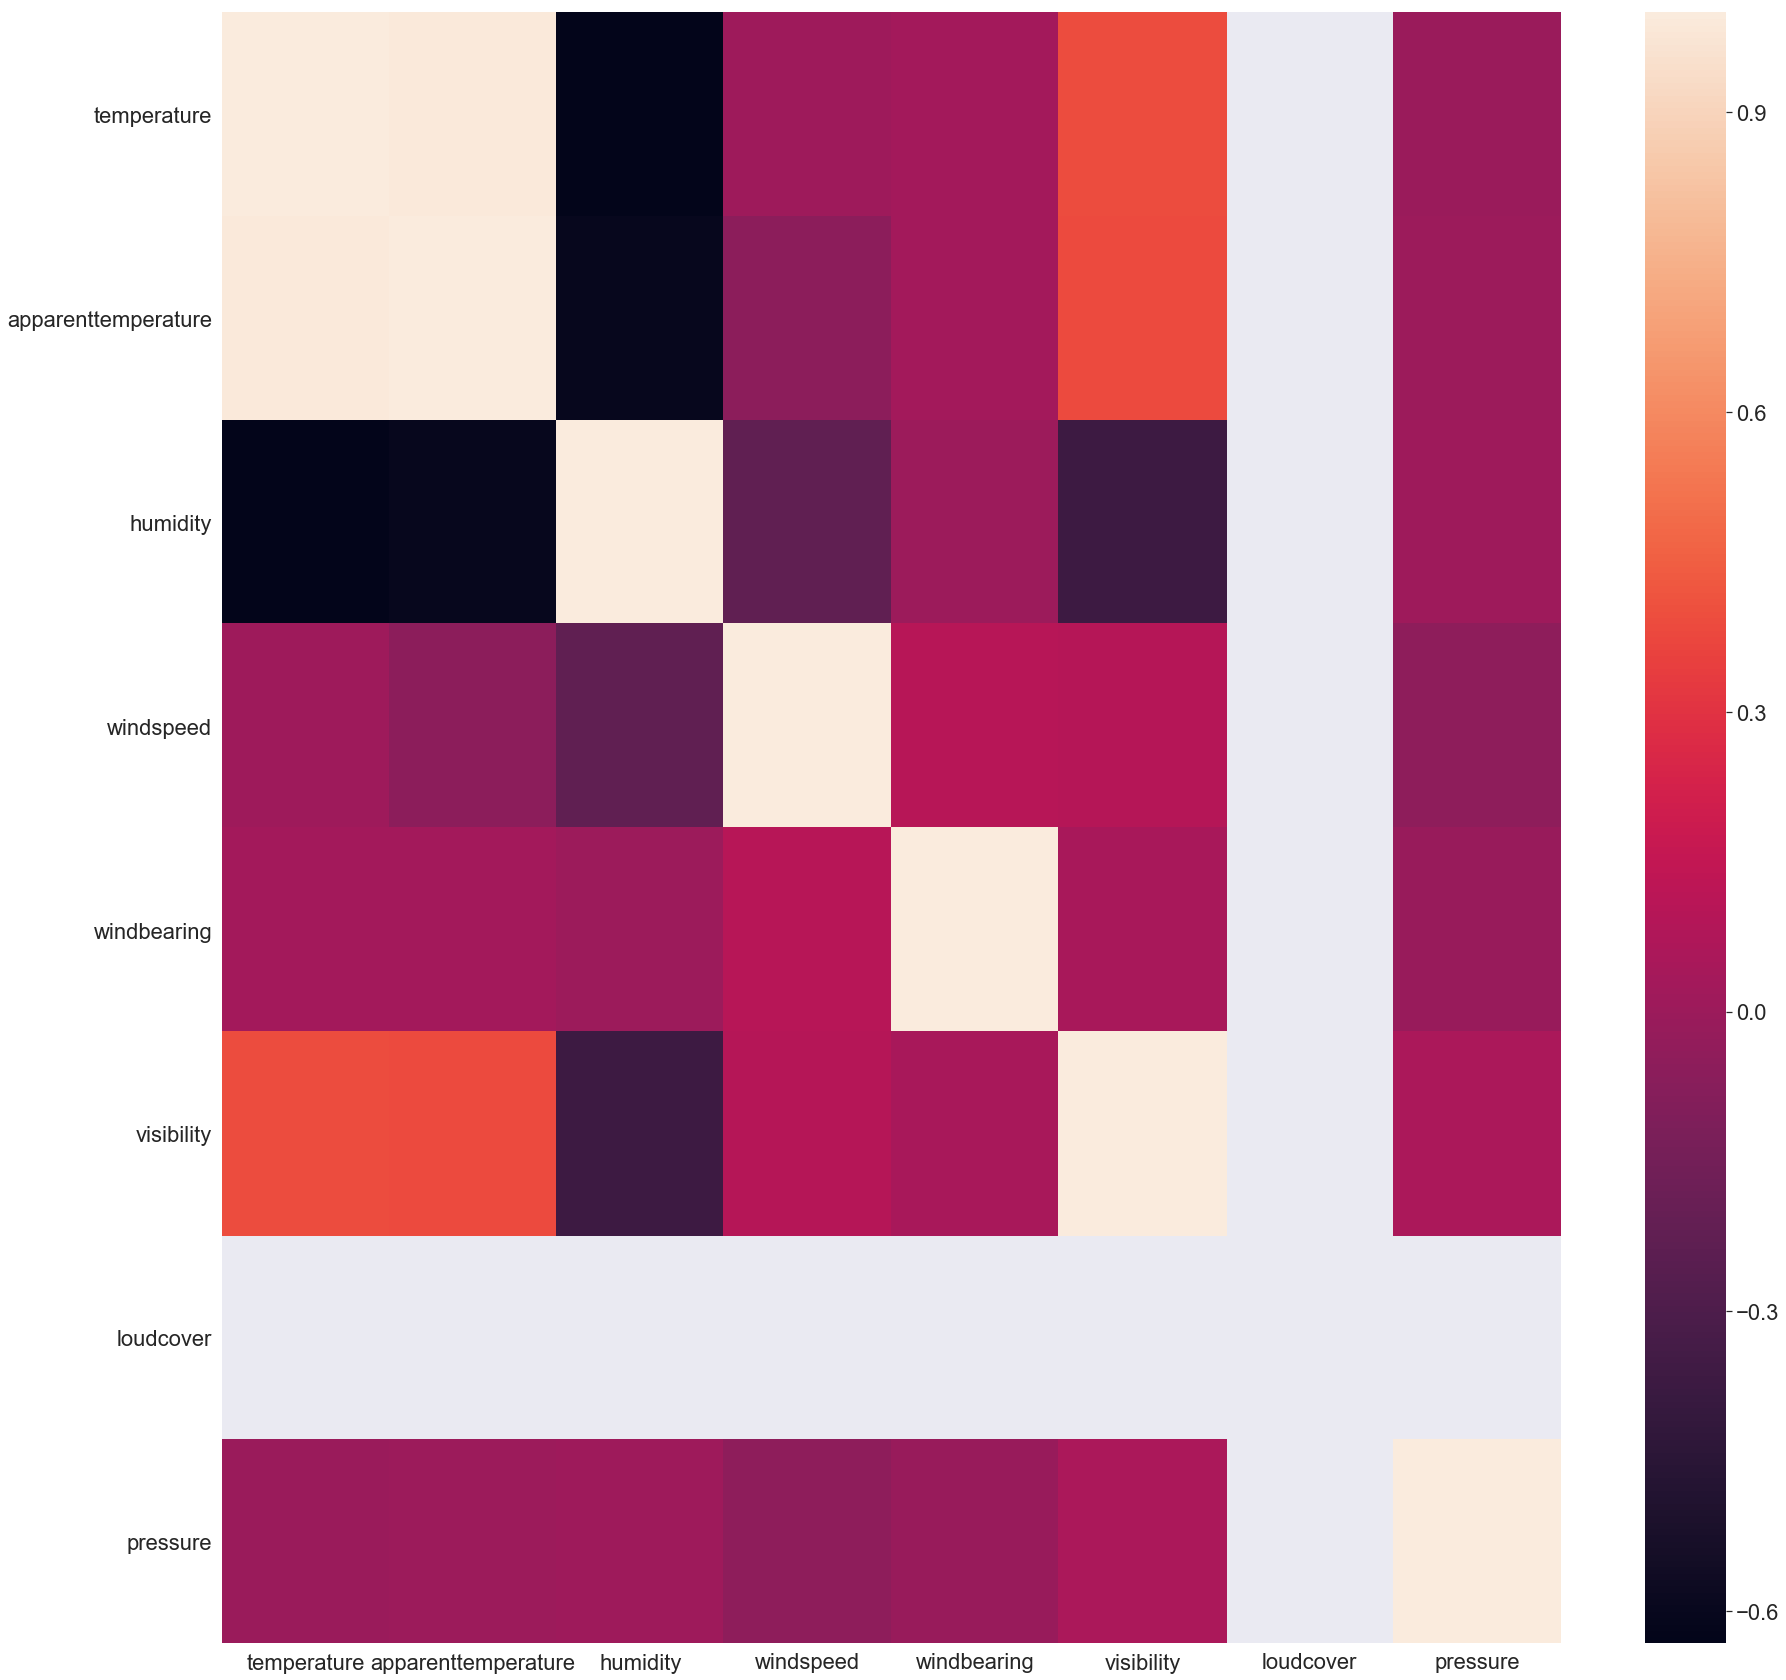

In [11]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(weather_num_df.corr())

High correlation between temperature and apparenttemperature & humidity. The remaining variables have much lower correlation values. Per instructions, will use humidity, windspeed, windbearing, and pressure as explanatory variables.

##### Build a regression model 
where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [12]:
# Y is the target variable
Y = weather_df['temperature']
# X is the feature set which includes
X = weather_df[['humidity','windspeed', 'windbearing', 'pressure']]

# create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)
print('\nR^2 score: \n', lrm.score(X,Y))


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.9264381852854

R^2 score: 
 0.4205778630374367


In [13]:
import statsmodels.api as sm
X_constant = sm.add_constant(X)

results = sm.OLS(Y, X_constant).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 21 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:31:12   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### check if your model meets the Gauss-Markov Conditions .
If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### Assumption one: linearity of the model in its coefficients

We can assume the linearily of the coefficients in the model as we use models that take into account this linearity assumption.

#### Assumption two: the error term should be zero on average

In [17]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

Mean of the errors in the weather model is: -6.282637831541205e-15


#### Assumption three: homoscedasticity

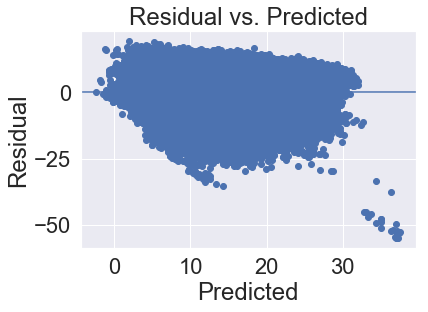

In [18]:
predictions = lrm.predict(X)
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [19]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The null hypothesis for both tests is that the errors are homoscedastic.

The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

Possible causes for heteroscedasticity: outliers in the data, omitted variables that are important in explaining the variance of the target variable. Dealing with outliers and including relevant variables help to fix (transforming dependent variable [Box Cox or log transformation] & adding features that target the poorly-estimated areas).


#### Assumption four: low multicollinearity
detect multicollinearity, we can simply look at the correlation matrix of the features. Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [20]:
features_df = weather_df[['humidity','windspeed', 'windbearing', 'pressure']]

In [21]:
#run corr of features only, not against target
np.abs(features_df.iloc[:,0:].corr())

,humidity,windspeed,windbearing,pressure
humidity,1.000,0.225,0.001,0.005
windspeed,0.225,1.000,0.104,0.049
windbearing,0.001,0.104,1.000,0.012
pressure,0.005,0.049,0.012,1.000


None of the features are highly correlated with each other. The highest correlation is <0.5.

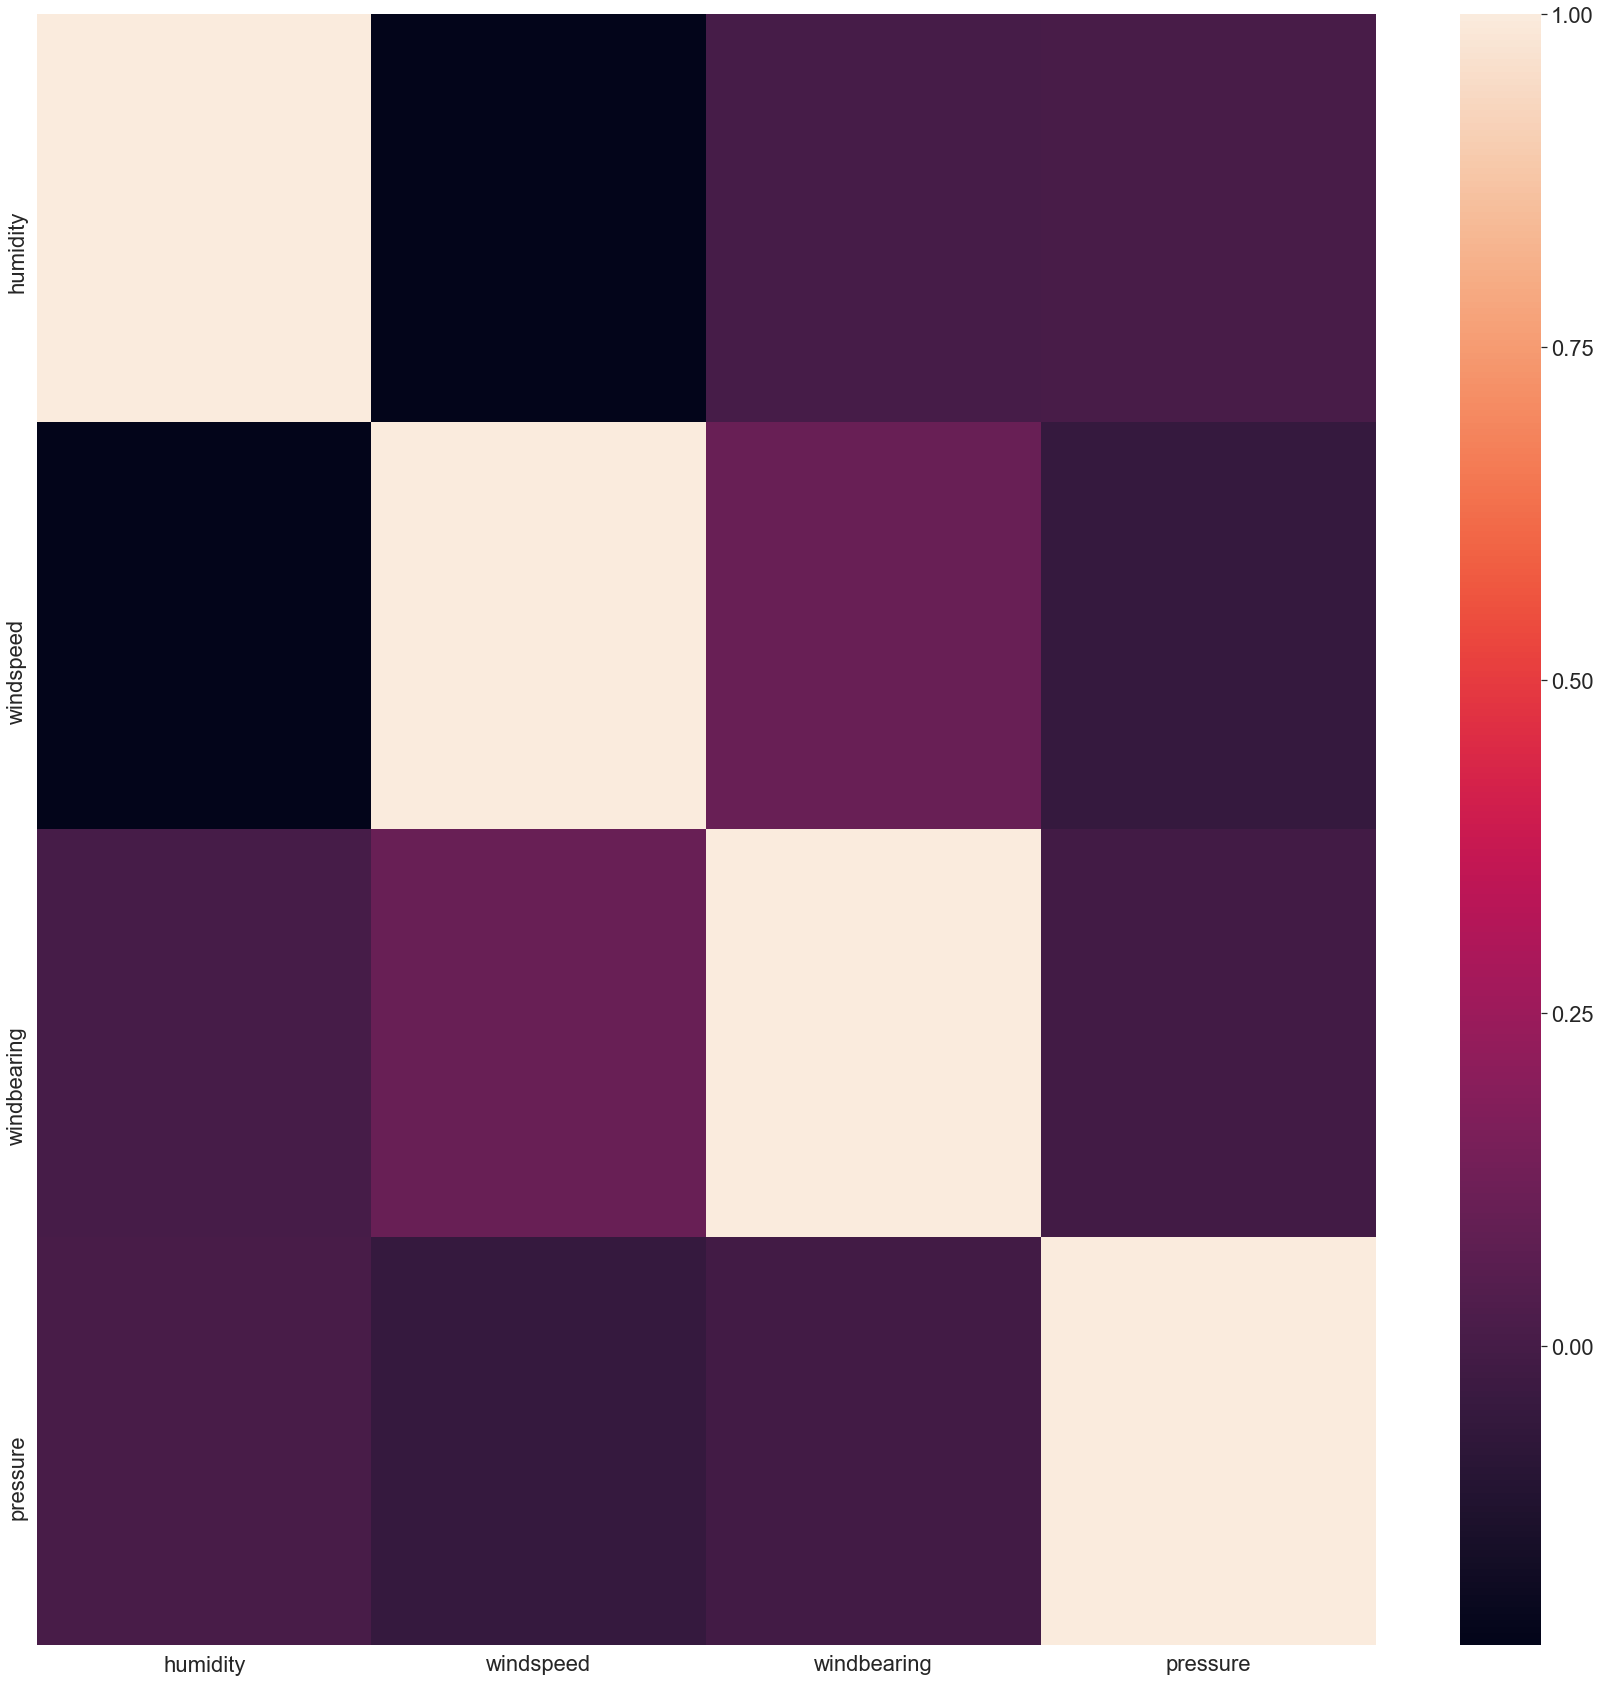

In [22]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(features_df.corr())

#### Assumption five: error terms should be uncorrelated with one another

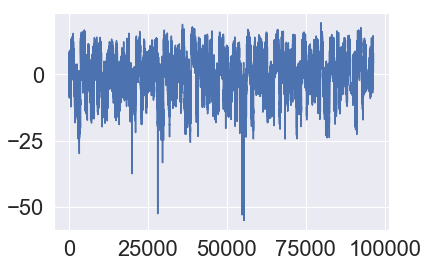

In [23]:
plt.plot(errors)
plt.show()

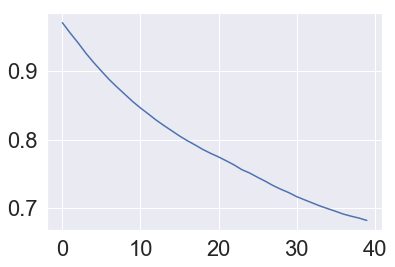

In [24]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

It appears there may be some autocorrelation between errors. 

#### Assumption six: features shouldn't be correlated with the errors

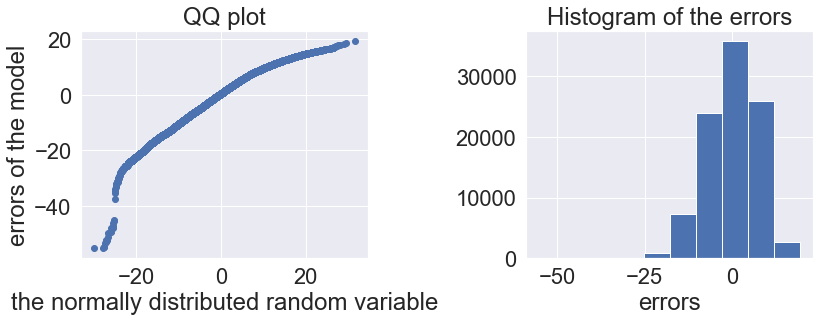

In [25]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel('the normally distributed random variable')
plt.ylabel('errors of the model')
plt.title('QQ plot')

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel('errors')
plt.title('Histogram of the errors')

plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [27]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252366 and p value is 0.0
Normality test statistics is 3375.432307699586 and p value is 0.0


The null hypothesis of both tests is that the errors are normally distributed. The p-values of both tests indicate that our errors are not normally distributed.